In [3]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 12

In [4]:
def load_data():
    # input image dimensions
    img_rows, img_cols = 28, 28

    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    return x_train, x_test,y_train,y_test,input_shape

def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(8, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return  model

def get_teacher_softmax(filename):
    return np.load(filename)

def show_images(data,N):
    for i in range(N):
#         print(np.argmax(teacher_softmaxs[i]))
        plt.imshow(data[i].reshape(28,28))
    
        plt.show()
        
def train_model(model,x,y,x_test,y_test):
    model.fit(x, y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


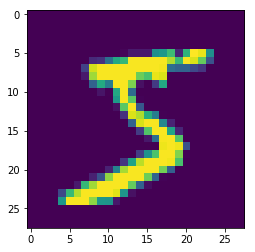

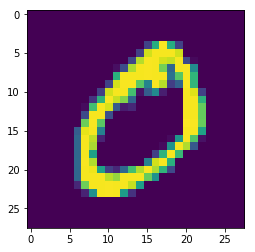

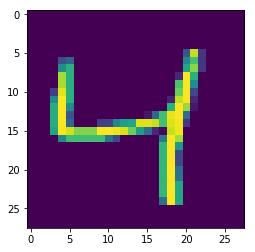

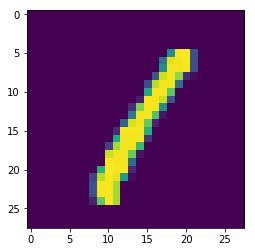

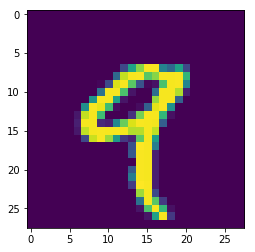

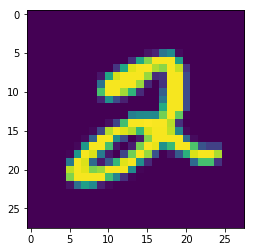

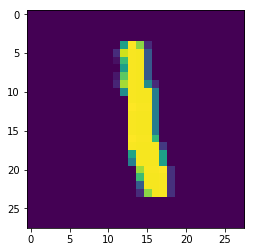

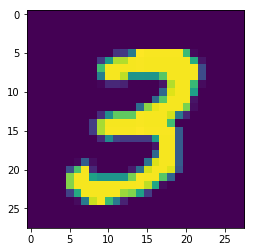

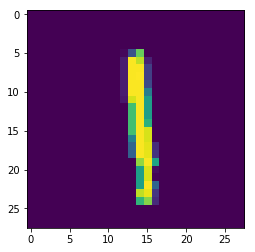

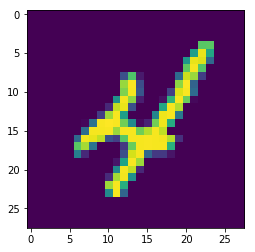

[5 0 4 1 9 2 1 3 1 4]
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 139us/step - loss: 0.3965 - acc: 0.8762 - val_loss: 0.0898 - val_acc: 0.9721
Epoch 2/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.1619 - acc: 0.9525 - val_loss: 0.0630 - val_acc: 0.9804
Epoch 3/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.1280 - acc: 0.9620 - val_loss: 0.0537 - val_acc: 0.9828
Epoch 4/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.1119 - acc: 0.9672 - val_loss: 0.0488 - val_acc: 0.9846
Epoch 5/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.0991 - acc: 0.9706 - val_loss: 0.0457 - val_acc: 0.9850
Epoch 6/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0912 - acc: 0.9726 - val_loss: 0.0416 - val_acc: 0.9860
Epoch 7/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0892 - acc: 0.9738 - val

In [6]:
#Main
l=0.5
x_train,x_test,y_train,y_test,input_shape=load_data()
model=create_model(input_shape)
teacher_softmaxs=get_teacher_softmax("teacher_mnist_softmax.npy")
show_images(x_train,10)
y_true_modified =  l*y_train + (1-l)* teacher_softmaxs
print(np.argmax(y_true_modified[:10],axis=1))
train_model(model,x_train,y_true_modified,x_test,y_test)

In [20]:
print(len())

100


In [17]:
res

array([[1.08195679e-12, 2.17155322e-10, 3.53858298e-09, 3.45059306e-08,
        1.71003905e-11, 2.86272525e-13, 1.71728279e-18, 1.00000000e+00,
        8.77060143e-12, 5.46378720e-09],
       [5.26032308e-11, 1.72930925e-07, 9.99999881e-01, 2.33231073e-10,
        3.90237213e-13, 1.34060082e-14, 3.02193243e-10, 6.09622186e-10,
        7.03873537e-09, 2.47219006e-17],
       [3.05247250e-09, 9.99993563e-01, 2.12116925e-06, 1.82092497e-09,
        1.73216779e-06, 1.81862048e-09, 1.64763435e-07, 2.12943269e-06,
        2.30675923e-07, 7.43389517e-10],
       [9.99977231e-01, 9.32397537e-09, 2.80731854e-07, 2.64207127e-08,
        1.32538048e-07, 1.23129905e-06, 1.82139229e-05, 5.02790840e-07,
        1.95934103e-06, 3.83864631e-07],
       [5.25410160e-10, 4.78518558e-09, 1.38021405e-09, 1.17536948e-13,
        9.99998569e-01, 1.61770985e-10, 1.07289372e-10, 1.58290242e-10,
        7.75103148e-10, 1.40219481e-06],
       [7.48386020e-10, 9.99997497e-01, 1.82324527e-07, 2.22275212e-10,
   